# Importing the libraries

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
dataset=pd.read_csv("StudentsPerformance.csv")
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Taking care of the missing data

In [4]:
dataset.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [5]:
for i in dataset.columns:
    print(i)
    print(dataset[i].unique())
    print("-"*40)

gender
['female' 'male']
----------------------------------------
race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
----------------------------------------
parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
----------------------------------------
lunch
['standard' 'free/reduced']
----------------------------------------
test preparation course
['none' 'completed']
----------------------------------------
math score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
----------------------------------------
reading score
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74 

# LABEL ENCODING

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()
dataset['gender'] = le.fit_transform(dataset['gender'])
dataset['race/ethnicity'] = le.fit_transform(dataset['race/ethnicity'])
dataset['parental level of education'] = le.fit_transform(dataset['parental level of education'])
dataset['lunch'] = le.fit_transform(dataset['lunch'])
dataset['test preparation course'] = le.fit_transform(dataset['test preparation course'])
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


# Data Visualisation

In [8]:
dataset['mean score']=((dataset["math score"]+dataset["reading score"]+dataset["writing score"])/3).round()
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,94.0
996,1,2,2,0,1,62,55,55,57.0
997,0,2,2,0,0,59,71,65,65.0
998,0,3,4,1,0,68,78,77,74.0


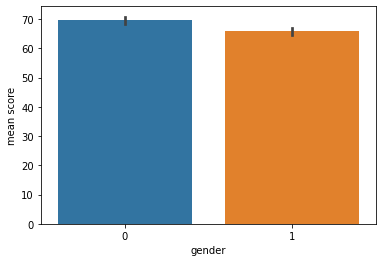

In [9]:
sns.barplot(x=dataset['gender'],y=dataset['mean score'])

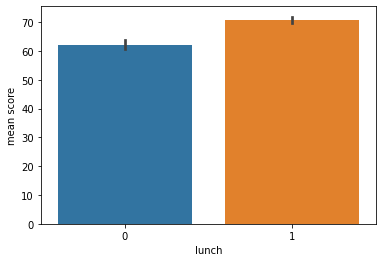

In [10]:
sns.barplot(x = dataset['lunch'], y = dataset['mean score'])

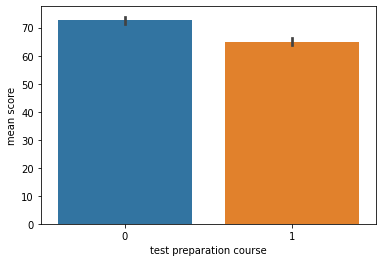

In [11]:
sns.barplot(x = 'test preparation course', y = 'mean score', data = dataset)
plt.show()

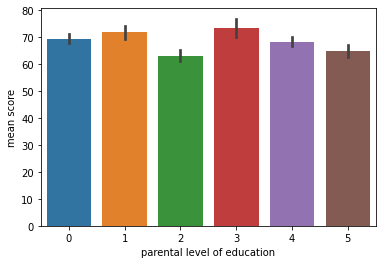

In [12]:
sns.barplot(x = 'parental level of education', y = 'mean score', data = dataset)

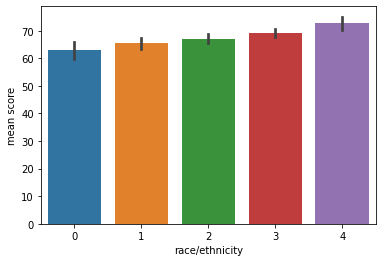

In [13]:
sns.barplot(x = 'race/ethnicity', y = 'mean score', data = dataset)

# Data Preprocessing

In [14]:
dataset=dataset.drop(['math score','reading score','writing score'],axis=1)
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0
...,...,...,...,...,...,...
995,0,4,3,1,0,94.0
996,1,2,2,0,1,57.0
997,0,2,2,0,0,65.0
998,0,3,4,1,0,74.0


# Separating dependent and independent variables

In [15]:
x=dataset.iloc[:,0:5].values
x

array([[0, 1, 1, 1, 1],
       [0, 2, 4, 1, 0],
       [0, 1, 3, 1, 1],
       ...,
       [0, 2, 2, 0, 0],
       [0, 3, 4, 1, 0],
       [0, 3, 4, 0, 1]])

In [16]:
x.shape

(1000, 5)

In [17]:
y=dataset.iloc[:,-1].values
y

array([ 73.,  82.,  93.,  49.,  76.,  77.,  92.,  41.,  65.,  49.,  55.,
        45.,  73.,  73.,  54.,  74.,  88.,  26.,  45.,  58.,  66.,  70.,
        50.,  72.,  75.,  73.,  59.,  70.,  68.,  69.,  72.,  63.,  64.,
        40.,  89.,  80.,  79.,  58.,  84.,  57.,  57.,  66.,  59.,  63.,
        53.,  59.,  61.,  71.,  69.,  83.,  52.,  71.,  46.,  80.,  81.,
        39.,  84.,  52.,  58.,   9.,  75.,  37.,  59.,  73.,  59.,  64.,
        40.,  69.,  58.,  53.,  65.,  60.,  47.,  58.,  46.,  41.,  26.,
        80.,  69.,  66.,  49.,  46.,  50.,  66.,  38.,  78.,  82.,  72.,
        65.,  80.,  70.,  32.,  74.,  46.,  86.,  80.,  64.,  68.,  62.,
        65.,  71.,  72.,  88.,  50.,  91.,  66.,  96.,  64.,  66.,  69.,
        88.,  55.,  51.,  54., 100.,  78.,  81.,  80.,  58.,  63.,  87.,
        91.,  91.,  59.,  79.,  89.,  69.,  72.,  79.,  50.,  85.,  43.,
        77.,  80.,  76.,  54.,  49.,  60.,  64.,  67.,  73.,  62.,  50.,
        49.,  80.,  31.,  82.,  69.,  75.,  98.,  6

In [18]:
y.shape

(1000,)

# Splitting data into train and test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
x_train.shape

(800, 5)

In [22]:
x_test

array([[0, 3, 1, 0, 1],
       [1, 2, 0, 0, 1],
       [1, 2, 2, 0, 0],
       [1, 3, 4, 0, 1],
       [0, 2, 4, 1, 1],
       [1, 2, 5, 1, 0],
       [0, 2, 1, 1, 1],
       [1, 2, 0, 1, 1],
       [1, 4, 4, 1, 0],
       [1, 3, 2, 1, 1],
       [0, 2, 4, 1, 1],
       [0, 1, 0, 0, 1],
       [1, 2, 1, 1, 0],
       [1, 2, 0, 1, 1],
       [0, 1, 4, 0, 0],
       [0, 2, 2, 0, 1],
       [1, 1, 2, 1, 1],
       [0, 2, 3, 1, 0],
       [0, 0, 3, 1, 1],
       [1, 0, 1, 1, 0],
       [0, 1, 4, 1, 1],
       [0, 3, 0, 0, 1],
       [0, 1, 0, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 3, 1, 0, 1],
       [1, 2, 0, 0, 1],
       [1, 1, 0, 1, 1],
       [1, 1, 2, 1, 0],
       [0, 2, 2, 0, 1],
       [0, 2, 4, 1, 0],
       [0, 1, 2, 0, 1],
       [1, 2, 4, 1, 0],
       [0, 0, 0, 1, 1],
       [0, 1, 2, 1, 1],
       [0, 3, 2, 0, 0],
       [1, 2, 0, 1, 1],
       [0, 3, 3, 1, 1],
       [1, 2, 2, 1, 0],
       [0, 2, 0, 1, 0],
       [0, 3, 2, 1, 1],
       [1, 3, 4, 1, 1],
       [1, 2, 2,

In [23]:
y_test

array([ 69.,  77.,  45.,  68.,  74.,  73.,  70.,  44.,  89.,  39.,  51.,
        64.,  84.,  81.,  54.,  39.,  52.,  86.,  54.,  80.,  63.,  56.,
        76.,  61.,  48.,  65.,  59.,  50.,  63.,  82.,  80.,  89.,  89.,
        57.,  55.,  85.,  97.,  60.,  71.,  73.,  69.,  57.,  70.,  71.,
        79.,  58.,  85.,  62.,  83.,  56.,  40.,  63.,  48.,  57.,  40.,
        71.,  53.,  64.,  77.,  61.,  68.,  78.,  50.,  72.,  66.,  64.,
        72.,  51.,  67.,  55.,  75.,  84.,  75.,  65.,  57.,  66.,  73.,
        70.,  29.,  77.,  79.,  86.,  69.,  83.,  68.,  76.,  65.,  91.,
        71.,  55.,  72.,  62.,  61.,  62.,  79.,  72.,  53.,  66.,  63.,
        65.,  42.,  87.,  64.,  41.,  78.,  76.,  69.,  59.,  56.,  86.,
        68.,  76.,  32.,  54.,  68.,  73.,  80.,  77.,  81.,  59.,  53.,
        78.,  91.,  81.,  75.,  56.,  73.,  75.,  71.,  62.,  66.,  67.,
        23.,  82.,  84.,  60.,  65.,  65.,  69.,  82.,  72.,  67.,  57.,
        60.,  77.,  38.,  41.,  45.,  81.,  89.,  5

# Model Building

In [24]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error

In [35]:
#K-Nearest Neighbors
neighbors = KNeighborsRegressor(n_neighbors= 15).fit(x_train, y_train)

In [39]:
from joblib import dump
dump(neighbors,'performance.save')

['performance.save']

In [37]:
neighbors_pred = neighbors.predict(x_test)
neighbors_pred

array([68.93333333, 63.46666667, 61.26666667, 61.53333333, 70.66666667,
       57.93333333, 73.26666667, 67.13333333, 69.6       , 62.73333333,
       70.66666667, 62.8       , 74.86666667, 67.13333333, 69.33333333,
       57.2       , 61.73333333, 77.46666667, 70.4       , 69.13333333,
       63.06666667, 68.8       , 63.46666667, 68.06666667, 60.        ,
       63.46666667, 63.4       , 65.26666667, 57.2       , 79.26666667,
       57.86666667, 77.        , 61.06666667, 72.2       , 69.66666667,
       67.13333333, 71.93333333, 72.2       , 74.8       , 68.46666667,
       66.13333333, 55.46666667, 63.4       , 75.8       , 66.33333333,
       74.8       , 65.2       , 63.66666667, 75.93333333, 69.4       ,
       67.13333333, 60.33333333, 57.33333333, 65.33333333, 69.46666667,
       68.93333333, 68.8       , 74.26666667, 75.2       , 68.8       ,
       60.        , 75.6       , 71.8       , 67.13333333, 64.93333333,
       59.53333333, 62.73333333, 65.2       , 71.53333333, 73.  

In [30]:
mean_absolute_error(y_test, neighbors_pred)

10.872333333333334

In [31]:
neighbors.predict([[1,2,0,0,1]])

array([63.46666667])